In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import  Dense , Flatten


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
print("X_train  ",len(X_train))
print("y_train  ",len(y_train))
print("X_test  ",len(X_test))
print("y_test  ",len(y_test))

X_train   60000
y_train   60000
X_test   10000
y_test   10000


In [9]:
X_train.shape

(60000, 28, 28)

5

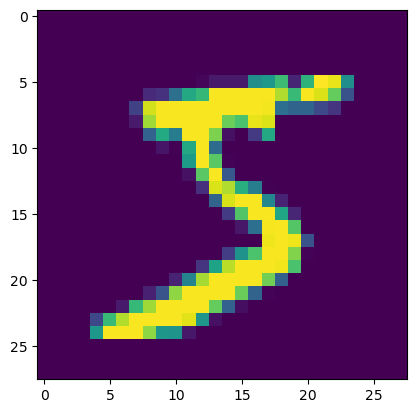

In [11]:
plt.imshow(X_train[0])
y_train[0]

In [12]:
X_train = X_train/255
X_test = X_test/255

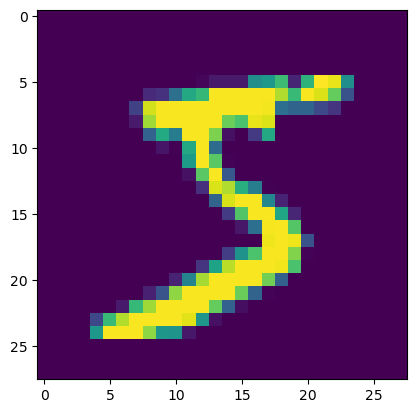

In [14]:
plt.imshow(X_train[0])

In [17]:
model = Sequential()

In [19]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,962 (492.04 KB)

 Trainable params: 125,962 (492.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8459 - loss: 0.4958 - val_accuracy: 0.9571 - val_loss: 0.1440
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1191 - val_accuracy: 0.9634 - val_loss: 0.1221
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0787 - val_accuracy: 0.9674 - val_loss: 0.1125
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9795 - loss: 0.0660 - val_accuracy: 0.9668 - val_loss: 0.1184
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9722 - val_loss: 0.0985


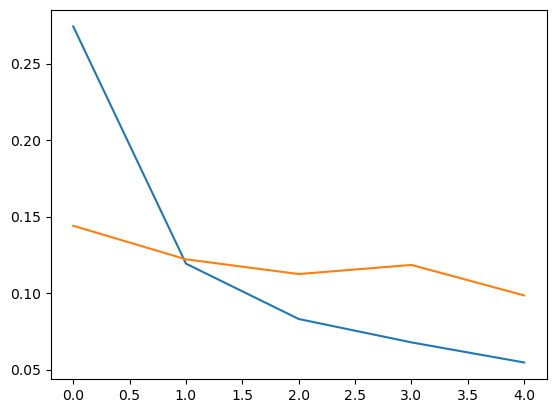

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

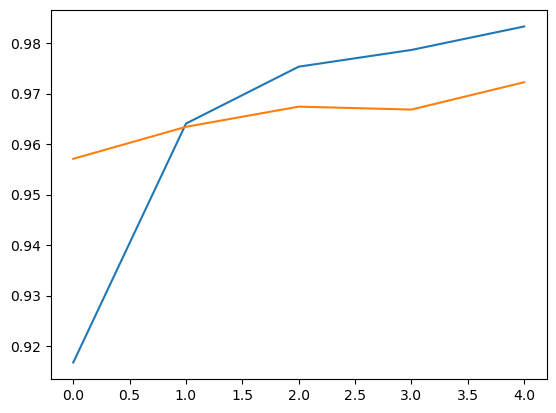

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [41]:
y_prid = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
len(y_prid)

10000

In [43]:
y_prid  = y_prid.argmax(axis=1)

In [44]:
y_prid

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score

In [48]:
print("Test accuracy ",accuracy_score(y_test,y_prid)*100)

Test accuracy  97.42
